In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(train_images, train_labels)
print (test_images, test_labels)
print("Shape of training images:", train_images.shape)
print("Shape of test images:", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 

In [ ]:
# Normalize pixel values to be between 0 and 1 and reshape for the CNN input
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
print("First training image after normalization:", train_images[0])

First training image after normalization: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.

In [ ]:
# Reshape the data to add the single channel dimension
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]
print("Shape after adding channel dimension:", train_images.shape)

Shape after adding channel dimension: (60000, 28, 28, 1)


In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Print the model summary
print("\nModel Summary:")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
print("\nTraining the model...")
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels),
                    batch_size=64,
                    verbose=2)


Training the model...
Epoch 1/5
938/938 - 84s - 90ms/step - accuracy: 0.9550 - loss: 0.1494 - val_accuracy: 0.9703 - val_loss: 0.1052
Epoch 2/5
938/938 - 82s - 87ms/step - accuracy: 0.9808 - loss: 0.0646 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 3/5
938/938 - 79s - 84ms/step - accuracy: 0.9855 - loss: 0.0502 - val_accuracy: 0.9901 - val_loss: 0.0341
Epoch 4/5
938/938 - 86s - 92ms/step - accuracy: 0.9890 - loss: 0.0385 - val_accuracy: 0.9906 - val_loss: 0.0351
Epoch 5/5
938/938 - 78s - 83ms/step - accuracy: 0.9908 - loss: 0.0318 - val_accuracy: 0.9908 - val_loss: 0.0335


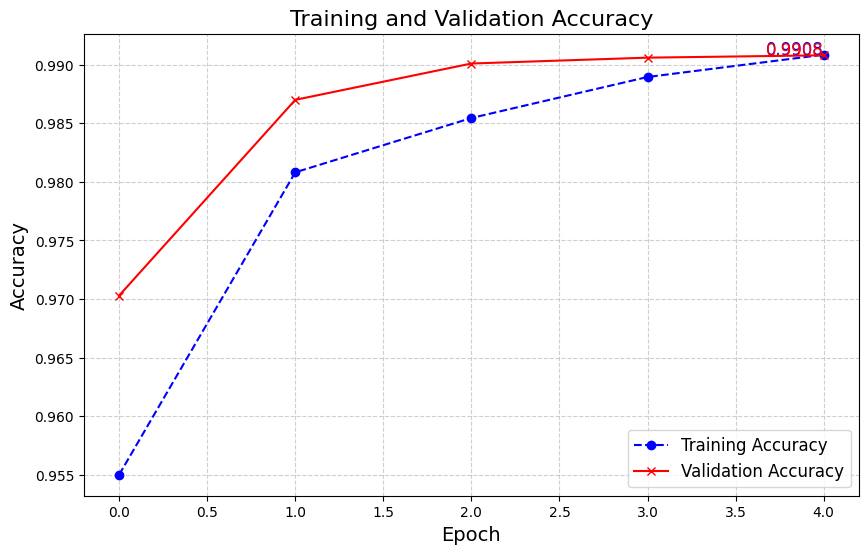

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='-', marker='x')

# Annotate the final accuracy values
final_epoch = len(history.history['accuracy']) - 1
train_acc = history.history['accuracy'][final_epoch]
val_acc = history.history['val_accuracy'][final_epoch]

plt.text(final_epoch, train_acc, f'{train_acc:.4f}', color='blue', fontsize=12, ha='right')
plt.text(final_epoch, val_acc, f'{val_acc:.4f}', color='red', fontsize=12, ha='right')

# Add labels, title, and grid
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)

# Display the plot
plt.show()

Saving download.png to download (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


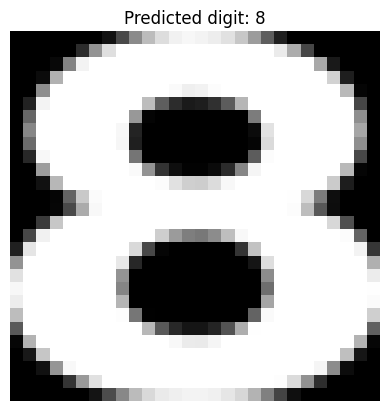

In [ ]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def predict_digit(img):
    # Preprocess the image to match the input shape required by the model
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0
    prediction = model.predict(img)
    return np.argmax(prediction)

def load_and_predict_image(file_path):
    # Load the image, convert to grayscale, resize to 28x28, and predict
    img = Image.open(file_path).convert('L')
    img = img.resize((28, 28))
    img = np.array(img)
    img = cv2.bitwise_not(img)  # Invert the image (white background, black digit)
    img = img.astype('float32')  # Ensure the image is in float format

    predicted_digit = predict_digit(img)
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted digit: {predicted_digit}')
    plt.axis('off')  # Hide axes
    plt.show()

# Upload a handwritten digit image to test
uploaded = files.upload()

# Load and predict the uploaded image
for filename in uploaded.keys():
    load_and_predict_image(filename)
